https://learn.astropy.org/tutorials/wcs-celestial-coordinates.html

In [1]:
from astropy.wcs import WCS
from astropy.io import fits
import matplotlib.pyplot as plt

In [2]:
wcs_input_dict = {
    "CTYPE1": "RA---TAN",
    "CUNIT1": "deg",
    "CDELT1": -0.0002777777778,
    "CRPIX1": 1,
    "CRVAL1": 337.5202808,
    "NAXIS1": 1024,
    "CTYPE2": "DEC--TAN",
    "CUNIT2": "deg",
    "CDELT2": 0.0002777777778,
    "CRPIX2": 1,
    "CRVAL2": -20.833333059999998,
    "NAXIS2": 1024,
}
wcs_helix_dict = WCS(wcs_input_dict)
wcs_helix_dict

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN' 'DEC--TAN'
CUNIT : 'deg' 'deg'
CRVAL : 337.5202808 -20.833333059999998
CRPIX : 1.0 1.0
PC1_1 PC1_2  : 1.0 0.0
PC2_1 PC2_2  : 0.0 1.0
CDELT : -0.0002777777778 0.0002777777778
NAXIS : 1024  1024

In [4]:
wcs_helix_list = WCS(naxis=2)
wcs_helix_list.wcs.crpix = [1, 1]
wcs_helix_list.wcs.crval = [337.5202808, -20.833333059999998]
wcs_helix_list.wcs.cunit = ["deg", "deg"]
wcs_helix_list.wcs.ctype = ["RA---TAN", "DEC--TAN"]
wcs_helix_list.wcs.cdelt = [-0.0002777777778, 0.0002777777778]
wcs_helix_list

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN' 'DEC--TAN'
CUNIT : 'deg' 'deg'
CRVAL : 337.5202808 -20.833333059999998
CRPIX : 1.0 1.0
PC1_1 PC1_2  : 1.0 0.0
PC2_1 PC2_2  : 0.0 1.0
CDELT : -0.0002777777778 0.0002777777778
NAXIS : 0  0

In [5]:
wcs_helix_list.array_shape = [1024, 1024]
wcs_helix_list

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN' 'DEC--TAN'
CUNIT : 'deg' 'deg'
CRVAL : 337.5202808 -20.833333059999998
CRPIX : 1.0 1.0
PC1_1 PC1_2  : 1.0 0.0
PC2_1 PC2_2  : 0.0 1.0
CDELT : -0.0002777777778 0.0002777777778
NAXIS : 1024  1024

In [6]:
header_data_unit_list = fits.open(
    "https://github.com/astropy/astropy-data/raw/6d92878d18e970ce6497b70a9253f65c925978bf/tutorials/celestial-coords1/tailored_dss.22.29.38.50-20.50.13_60arcmin.fits"
)
header_data_unit_list.info()

Filename: C:\Users\Soham Das\.astropy\cache\download\url\21d072715b8ee90ab2fe1405b0e5fb1a\contents
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     121   (2119, 2119)   int16   


In [7]:
image = header_data_unit_list[0].data
header = header_data_unit_list[0].header
header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                   16 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 2119                                                  
NAXIS2  =                 2119                                                  
DATE    = '03/09/19          ' /Date of FITS file creation                      
ORIGIN  = 'CASB -- STScI     ' /Origin of FITS image                            
PLTLABEL= 'J 10265           ' /Observatory plate label                         
PLATEID = '04I5              ' /GSSS Plate ID                                   
REGION  = 'S602              ' /GSSS Region Name                                
DATE-OBS= '1985-06-15'         / UT date of Observation                         
UT      = '18:30:00.00       ' /UT time of observation                          
EPOCH   =  1.9854542236328E+

In [8]:
wcs_helix = WCS(header)
wcs_helix

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN' 'DEC--TAN'
CUNIT : 'deg' 'deg'
CRVAL : 336.6811440416667 -19.745016572222223
CRPIX : 2499.6447489941065 3378.9002584168584
PC1_1 PC1_2  : 0.025282857855146917 4.4684674035885186e-05
PC2_1 PC2_2  : -4.8420685266167345e-05 0.0252859566668733
CDELT : -0.01867333422948538 0.01867333422948538
NAXIS : 2119  2119

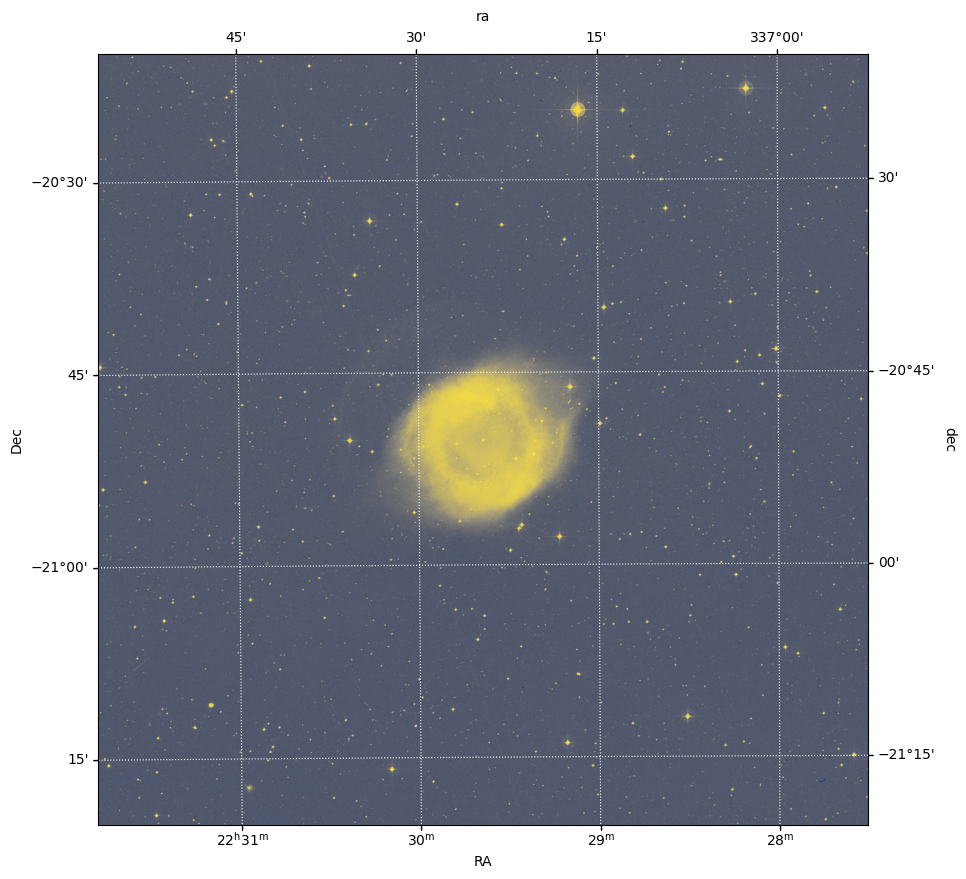

In [10]:
fig = plt.figure(figsize=(10, 10))
ax = plt.subplot(projection=wcs_helix)
plt.imshow(image, origin="lower", cmap="cividis", aspect="equal")
plt.xlabel(r"RA")
plt.ylabel(r"Dec")

overlay = ax.get_coords_overlay("icrs")
overlay.grid(color="white", ls="dotted")

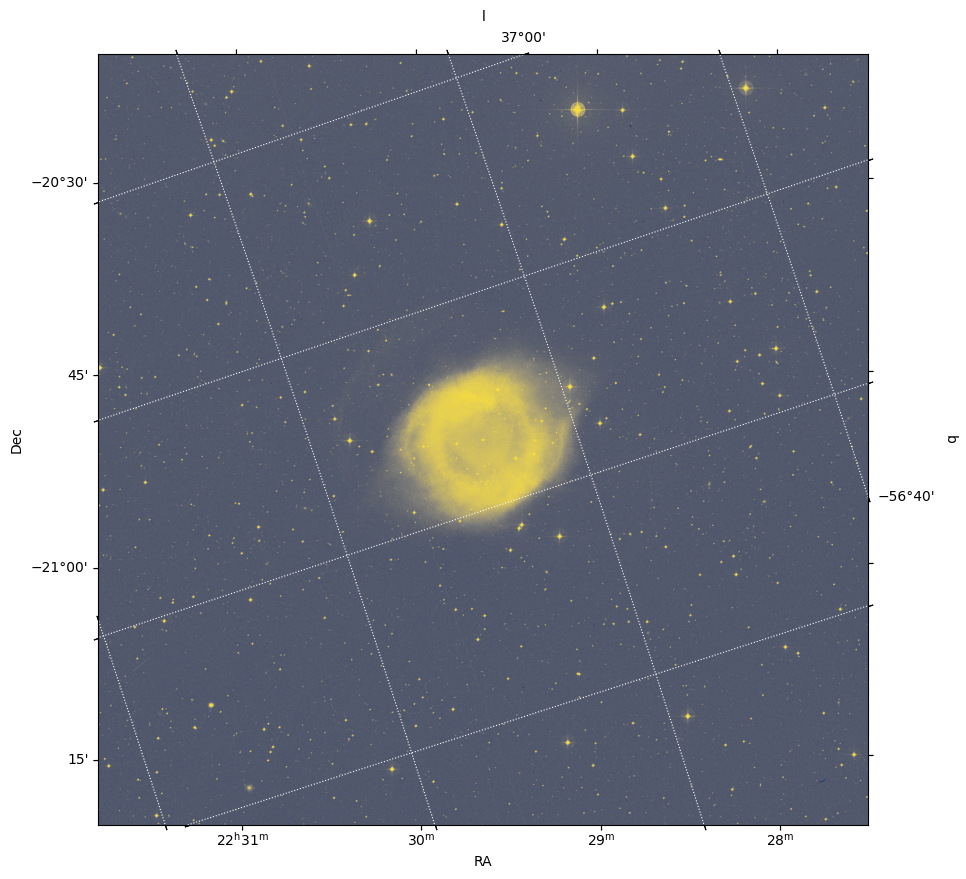

In [11]:
fig = plt.figure(figsize=(10, 10))
ax = plt.subplot(projection=wcs_helix)
plt.imshow(image, origin="lower", cmap="cividis", aspect="equal")
plt.xlabel(r"RA")
plt.ylabel(r"Dec")

overlay = ax.get_coords_overlay("galactic")
overlay.grid(color="white", ls="dotted")

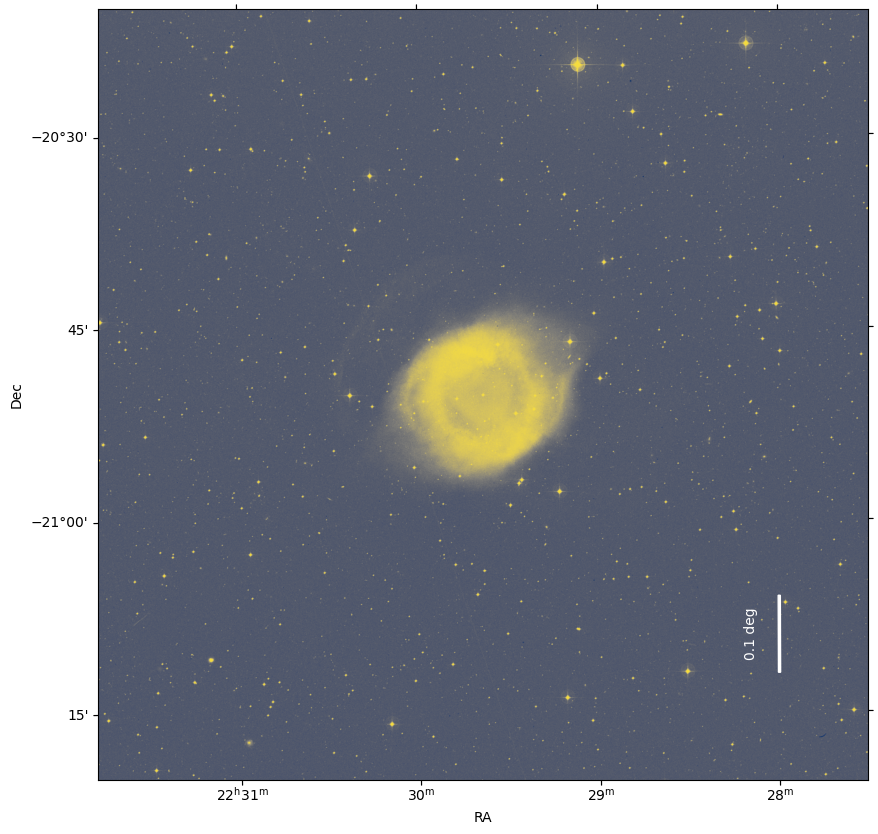

In [12]:
fig = plt.figure(figsize=(10, 10), frameon=False)
ax = plt.subplot(projection=wcs_helix)
ax.arrow(
    337,
    -21.2,
    0,
    0.1,
    head_width=0,
    head_length=0,
    fc="white",
    ec="white",
    width=0.003,
    transform=ax.get_transform("icrs"),
)
plt.text(
    337.05,
    -21.18,
    "0.1 deg",
    color="white",
    rotation=90,
    transform=ax.get_transform("icrs"),
)
plt.imshow(image, origin="lower", cmap="cividis", aspect="equal")
plt.xlabel(r"RA")
plt.ylabel(r"Dec")